In [22]:
# See https://keras.io/applications for details
# from tensorflow.python.keras.applications.densenet import DenseNet121, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet169, decode_predictions, preprocess_input
from tensorflow.python.keras.applications.densenet import DenseNet201, decode_predictions, preprocess_input
model = DenseNet201()

In [23]:
#model.summary()

In [24]:
# First Layer Varibles
[w for w in model.weights if w.name.startswith('conv1')]

[<tf.Variable 'conv1/conv_1/kernel:0' shape=(7, 7, 3, 64) dtype=float32>,
 <tf.Variable 'conv1/bn_1/gamma:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1/bn_1/beta:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1/bn_1/moving_mean:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1/bn_1/moving_variance:0' shape=(64,) dtype=float32>]

In [25]:
import tensorflow as tf
s = tf.keras.backend.get_session()

In [26]:
kw = s.run(model.weights[0])

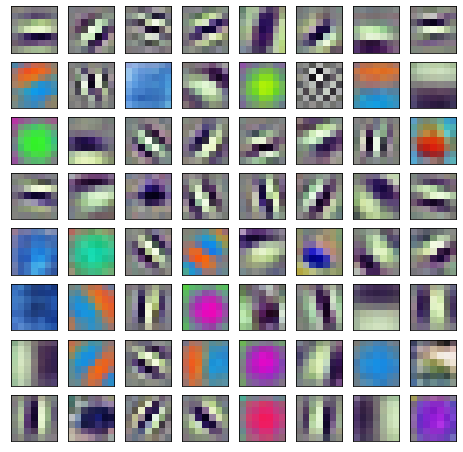

In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_conv_kernel(w):    
    cols = 8
    rows = math.ceil(w.shape[-1]/cols)

    plt.figure(figsize=[1 * cols, 1 * rows])
    for i in range(w.shape[-1]):
        wt = w[:, :, :, i]
        
        # Rescaling so that sigmoid is saturated.
        wt /= wt.ravel().std()
        wt = sigmoid(wt)
        
        plt.subplot(rows, cols, i+1)
        plt.imshow(wt, vmin=0, vmax=1)
        plt.xticks([])
        plt.yticks([])

    plt.show()
    
plot_conv_kernel(kw)

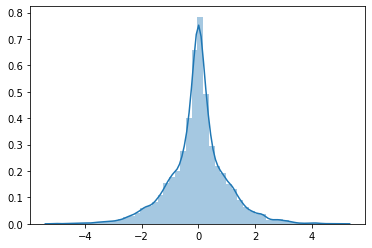

In [28]:
import seaborn as sns
sns.distplot(kw.ravel())